In [2]:
import numpy as np
import pandas as pd
import data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import set_config

set_config(transform_output="pandas")

In [3]:
# load the data

df = pd.read_csv('swiggy.csv')

In [4]:
# load the cleaned data

df = pd.read_csv('cleaned_data.csv')

df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,friday,0,5.0,19.0,evening,20.183530,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846,short
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,CHEN,11,3,friday,0,15.0,23.0,night,4.657195,short
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393,medium


In [5]:
for col in df.columns:
    if df[col].astype(str).str.contains("NaN", case=False).any():
        print(col)

age
ratings
restaurant_latitude
restaurant_longitude
delivery_latitude
delivery_longitude
weather
traffic
multiple_deliveries
festival
city_type
pickup_time_minutes
order_time_hour
distance
distance_type


In [6]:
rows_with_string_nan = df[df.astype(str).apply(lambda x: x.str.contains("NaN", case=False)).any(axis=1)]
rows_with_string_nan.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
17,HYDRES14DEL01,34.0,4.9,17.426228,78.407495,17.496228,78.477495,2022-03-20,cloudy,jam,...,HYD,20,3,sunday,1,10.0,20.0,night,10.757109,long
33,RANCHIRES02DEL01,32.0,3.5,NaN,NaN,NaN,NaN,2022-03-08,stormy,jam,...,RANCHI,8,3,tuesday,0,10.0,21.0,night,NaN,NaN
42,MUMRES17DEL02,NaN,NaN,19.121999,72.908493,19.201999,72.988493,2022-04-06,cloudy,medium,...,MUM,6,4,wednesday,0,NaN,NaN,after_midnight,12.236724,long
52,AURGRES20DEL03,25.0,5.0,NaN,NaN,NaN,NaN,2022-02-13,cloudy,low,...,AURG,13,2,sunday,1,15.0,22.0,night,NaN,NaN
57,VADRES02DEL02,39.0,4.2,NaN,NaN,NaN,NaN,2022-03-02,fog,jam,...,VAD,2,3,wednesday,0,15.0,20.0,night,NaN,NaN


In [7]:
df.astype(str).apply(lambda x: x.str.contains("NaN", case=False).sum())

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day          0
distance                3630
distance_type           3630
dtype: int64

In [92]:
df = df.replace("NaN", np.NaN).replace("nan", np.NaN).replace("NA", np.NaN)

In [93]:
df = df.replace(r"\s*NaN\s*", np.nan, regex=True)
df = df.replace(r"\s*nan\s*", np.nan, regex=True)
df = df.replace(r"\s*NA\s*", np.nan, regex=True)

In [94]:
(df.astype(str).apply(lambda x: x.str.contains("NaN", case=False)).any()).any()

True

In [95]:
for col in df.columns:
    if df[col].astype(str).str.contains("NaN", case=False).any():
        print("String NaN found in:", col)

String NaN found in: age
String NaN found in: ratings
String NaN found in: weather
String NaN found in: traffic
String NaN found in: multiple_deliveries
String NaN found in: festival
String NaN found in: city_type
String NaN found in: pickup_time_minutes
String NaN found in: distance
String NaN found in: distance_type


In [96]:
df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day         0
distance               3630
distance_type          3630
dtype: int64

In [87]:

df.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'is_weekend', 'pickup_time_minutes',
       'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [8]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,0,10.0,morning,1.489846,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,0,5.0,afternoon,6.232393,medium


In [9]:
# check for missing values

df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day         0
distance               3630
distance_type          3630
dtype: int64

In [10]:
# check for duplicates

df.duplicated().sum()

0

<Axes: >

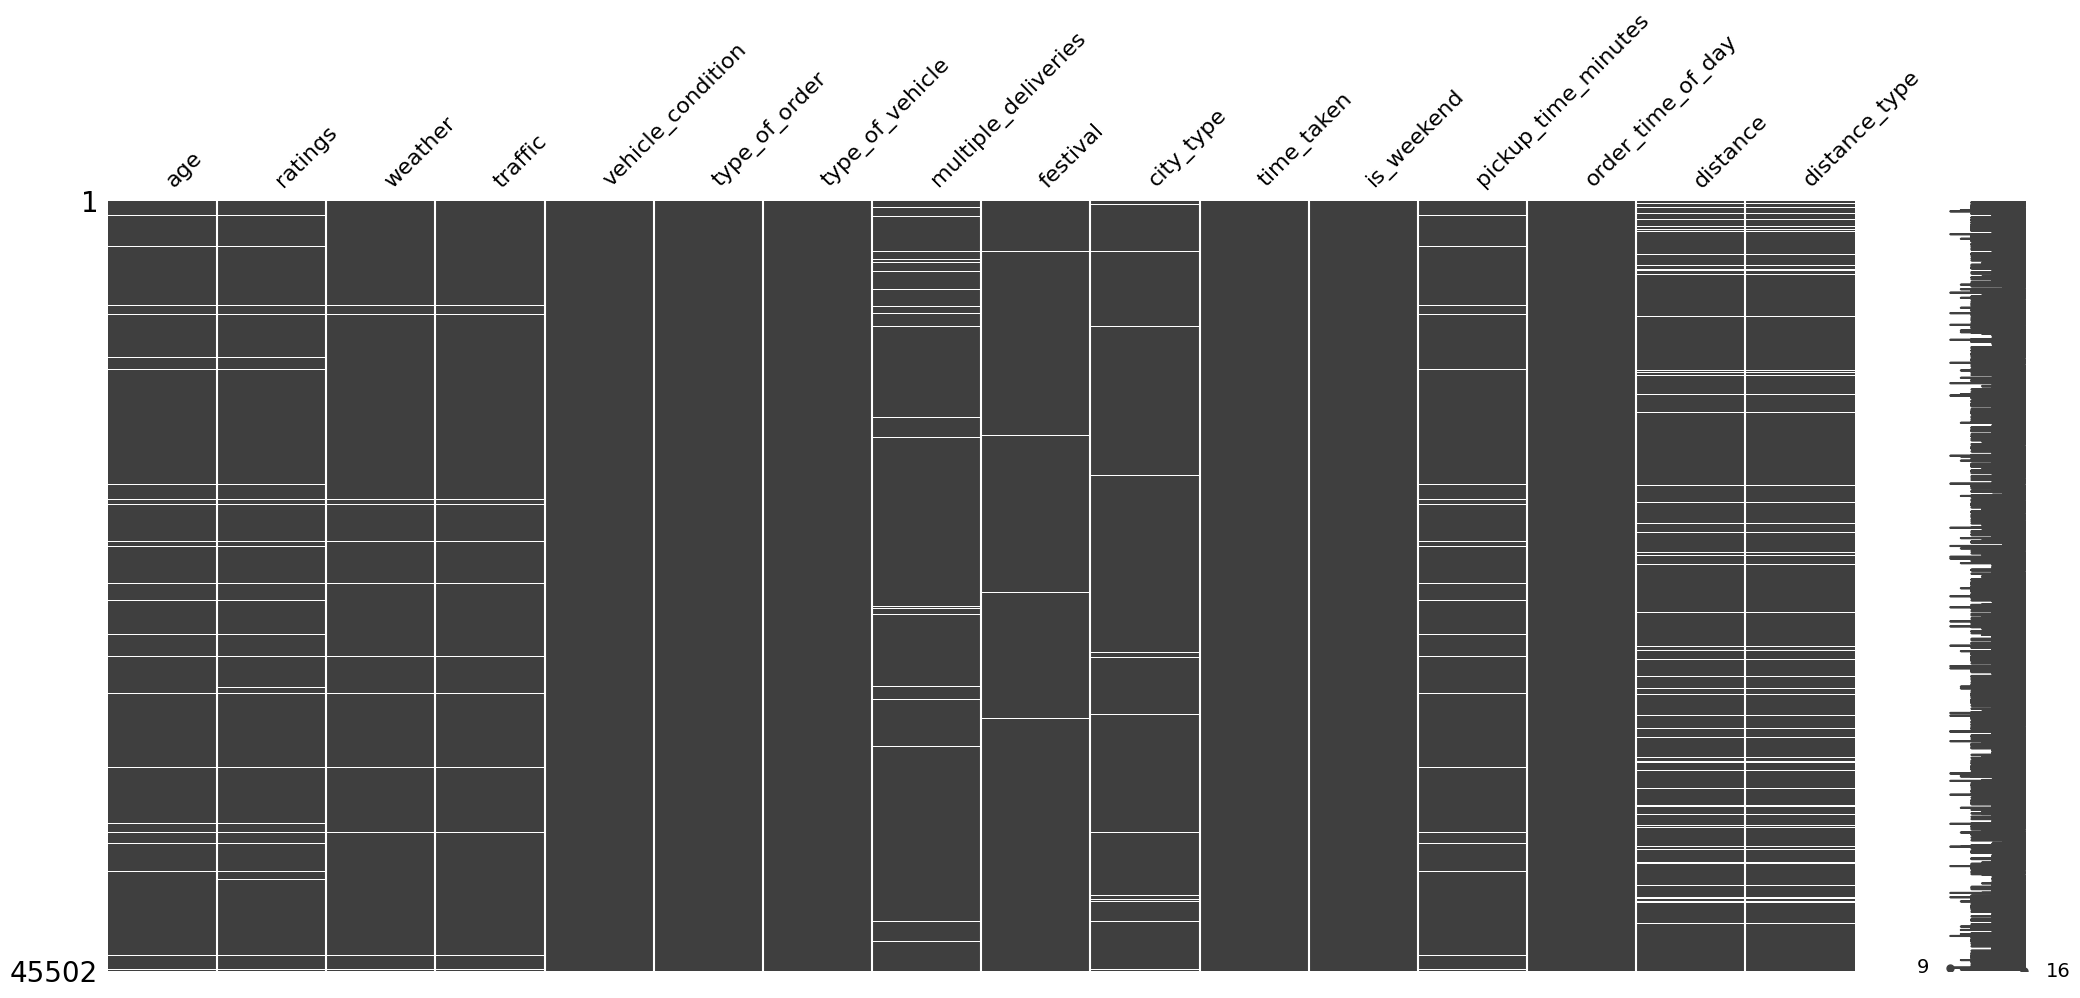

In [205]:

import missingno as msno

msno.matrix(df)

In [228]:
# columns that have missing values

missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'distance',
       'distance_type'],
      dtype='object')

In [229]:
import mlflow

In [230]:
mlflow.set_tracking_uri("http://ec2-13-51-205-67.eu-north-1.compute.amazonaws.com:5000/")

In [231]:

# mlflow experiment

mlflow.set_experiment("Exp 1 - Keeping Vs Dropping Missing Values")

<Experiment: artifact_location='s3://apoorv-mlfow-bucket/640006038145149925', creation_time=1762701923817, experiment_id='640006038145149925', last_update_time=1762701923817, lifecycle_stage='active', name='Exp 1 - Keeping Vs Dropping Missing Values', tags={}>

In [11]:
temp_df = df.copy().dropna()

In [233]:
(temp_df.astype(str).apply(lambda x: x.str.contains("NaN", case=False)).any()).any()

False

In [234]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,0,10.0,night,16.600272,very_long
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,0,10.0,morning,1.489846,short
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,0,5.0,afternoon,6.232393,medium


In [235]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [236]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (30451, 15)
The shape of test data is (7613, 15)


In [237]:
y_train

24939    17
9439     26
18409    39
15267    17
43924    17
         ..
20042    19
7521     39
13483    18
1038     18
18803    37
Name: time_taken, Length: 30451, dtype: int64

In [238]:
# missing data in training data

X_train.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
distance_type          0
dtype: int64

In [239]:
X_train.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'is_weekend', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [240]:
len(X_train.columns)

15

In [241]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [242]:
len(num_cols + nominal_cat_cols + ordinal_cat_cols)

13

In [243]:
for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['jam' 'low' 'medium' 'high']
distance_type ['short' 'very_long' 'long' 'medium']


In [ ]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [244]:

# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order]), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

preprocessor.set_output(transform="pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [245]:
# transform the data

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_trans

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,city_type_urban,is_weekend_1,order_time_of_day_afternoon,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
24939,0.052632,0.80,0.5,0.163629,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1,0.0
9439,0.526316,0.96,1.0,0.157036,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2,1.0
18409,0.631579,1.00,0.0,0.160160,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,2,2.0
15267,0.789474,0.96,0.5,0.003145,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0
43924,0.157895,0.88,0.5,0.084651,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20042,0.368421,0.88,1.0,0.621266,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2,1.0
7521,0.842105,0.88,0.0,0.788907,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,0,1.0
13483,0.736842,0.92,0.5,0.154044,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1.0
1038,0.368421,0.92,0.5,0.992901,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2,1.0


In [246]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [247]:
pt.lambdas_

array([0.31530632])

In [248]:
y_train_pt

,x0
0,-1.058728
1,0.051344
2,1.271713
3,-1.058728
4,-1.058728
...,...
30446,-0.783779
30447,1.271713
30448,-0.918775
30449,-0.918775


In [249]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [250]:
# 1. Build the model
lr = LinearRegression()

In [251]:
# 2. Train using transformed features and transformed target
lr.fit(X_train_trans, y_train_pt)

LinearRegression()

In [252]:
# 3. Predict on transformed test features
y_pred_pt = lr.predict(X_test_trans).reshape(-1, 1)

In [253]:
# 4. Inverse transform predictions to original scale
y_pred = pt.inverse_transform(y_pred_pt)
y_test_original = y_test.values.reshape(-1, 1)

In [254]:
# 5. Evaluation
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print("Linear Regression Performance")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

Linear Regression Performance
MAE: 4.728031879512228
RMSE: 5.908293618293641
R2 Score: 0.6008505151579088


In [255]:
import mlflow
import mlflow.sklearn
import json

# ✅ Set your experiment first
mlflow.set_experiment("Exp 1 - Keeping Vs Dropping Missing Values")

with mlflow.start_run(run_name="Linear Regression - Dropping Missing Values"):

    # ----- Parameters -----
    mlflow.log_param("model_name", "LinearRegression")
    mlflow.log_param("fit_intercept", lr.fit_intercept if hasattr(lr, "fit_intercept") else None)
    mlflow.log_param("missing_strategy", "Dropped Missing Values")  # optional label

    # ----- Metrics -----
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)

    # ----- Log Feature Names -----
    features = list(X_train_trans.columns)
    mlflow.log_text(json.dumps(features, indent=4), "features.json")

    # ----- Log Model -----
    mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="linear_regression_model"
    )

    # ----- Log Preprocessor -----
    mlflow.sklearn.log_model(
        sk_model=preprocessor,
        artifact_path="preprocessor"
    )

print("✅ Logged Linear Regression inside: Exp 1 - Keeping Vs Dropping Missing Values")


2025/11/10 14:04:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 14:04:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/10 14:04:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 14:04:45 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/11/10 14:04:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Linear Regression - Dropping Missing Values at: http://ec2-13-51-205-67.eu-north-1.compute.amazonaws.com:5000/#/experiments/640006038145149925/runs/bf5a7cd9c90b43f697d18d7d41f9ab3d
🧪 View experiment at: http://ec2-13-51-205-67.eu-north-1.compute.amazonaws.com:5000/#/experiments/640006038145149925
✅ Logged Linear Regression inside: Exp 1 - Keeping Vs Dropping Missing Values


# Applying random_forest


In [256]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [257]:
# 1. Build the model
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

In [258]:
# 2. Train on transformed X and transformed y
rf.fit(X_train_trans, y_train_pt.values.ravel())   # ravel() because y must be 1D

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [259]:
y_pred_pt = rf.predict(X_test_trans).reshape(-1, 1)

In [260]:
# Inverse transform predictions
y_pred = pt.inverse_transform(y_pred_pt)
y_test_original = y_test.values.reshape(-1, 1)

In [261]:
# Metrics
print("MAE:", mean_absolute_error(y_test_original, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_original, y_pred)))
print("R2:", r2_score(y_test_original, y_pred))

MAE: 3.128748302620432
RMSE: 3.9095633165689594
R2: 0.8252295777562546


In [262]:
import mlflow
import mlflow.sklearn
import json

# ✅ Set your experiment
mlflow.set_experiment("Exp 1 - Keeping Vs Dropping Missing Values")

with mlflow.start_run(run_name="Random Forest - Dropped Missing Values"):

    # ----- Parameters -----
    mlflow.log_param("model_name", "RandomForestRegressor")
    mlflow.log_param("missing_strategy", "Dropped Missing Values")
    mlflow.log_param("n_estimators", rf.n_estimators)
    mlflow.log_param("max_depth", rf.max_depth)
    mlflow.log_param("min_samples_split", rf.min_samples_split)
    mlflow.log_param("min_samples_leaf", rf.min_samples_leaf)

    # ----- Metrics -----
    mlflow.log_metric("MAE", mean_absolute_error(y_test_original, y_pred))
    mlflow.log_metric("RMSE", float(np.sqrt(mean_squared_error(y_test_original, y_pred))))
    mlflow.log_metric("R2", r2_score(y_test_original, y_pred))

    # ----- Log Feature Names -----
    feature_list = list(X_train_trans.columns)
    mlflow.log_text(json.dumps(feature_list, indent=4), "features.json")

    # ----- Log Model -----
    mlflow.sklearn.log_model(
        sk_model=rf,
        artifact_path="random_forest_model"
    )

    # ----- Log Preprocessor -----
    mlflow.sklearn.log_model(
        sk_model=preprocessor,
        artifact_path="preprocessor"
    )

print("✅ RF Model logged under: Exp 1 - Keeping Vs Dropping Missing Values")


2025/11/10 14:08:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 14:08:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/10 14:12:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 14:13:01 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/11/10 14:13:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest - Dropped Missing Values at: http://ec2-13-51-205-67.eu-north-1.compute.amazonaws.com:5000/#/experiments/640006038145149925/runs/1b6f6477253f4595a04ca69c9167d2bf
🧪 View experiment at: http://ec2-13-51-205-67.eu-north-1.compute.amazonaws.com:5000/#/experiments/640006038145149925
✅ RF Model logged under: Exp 1 - Keeping Vs Dropping Missing Values


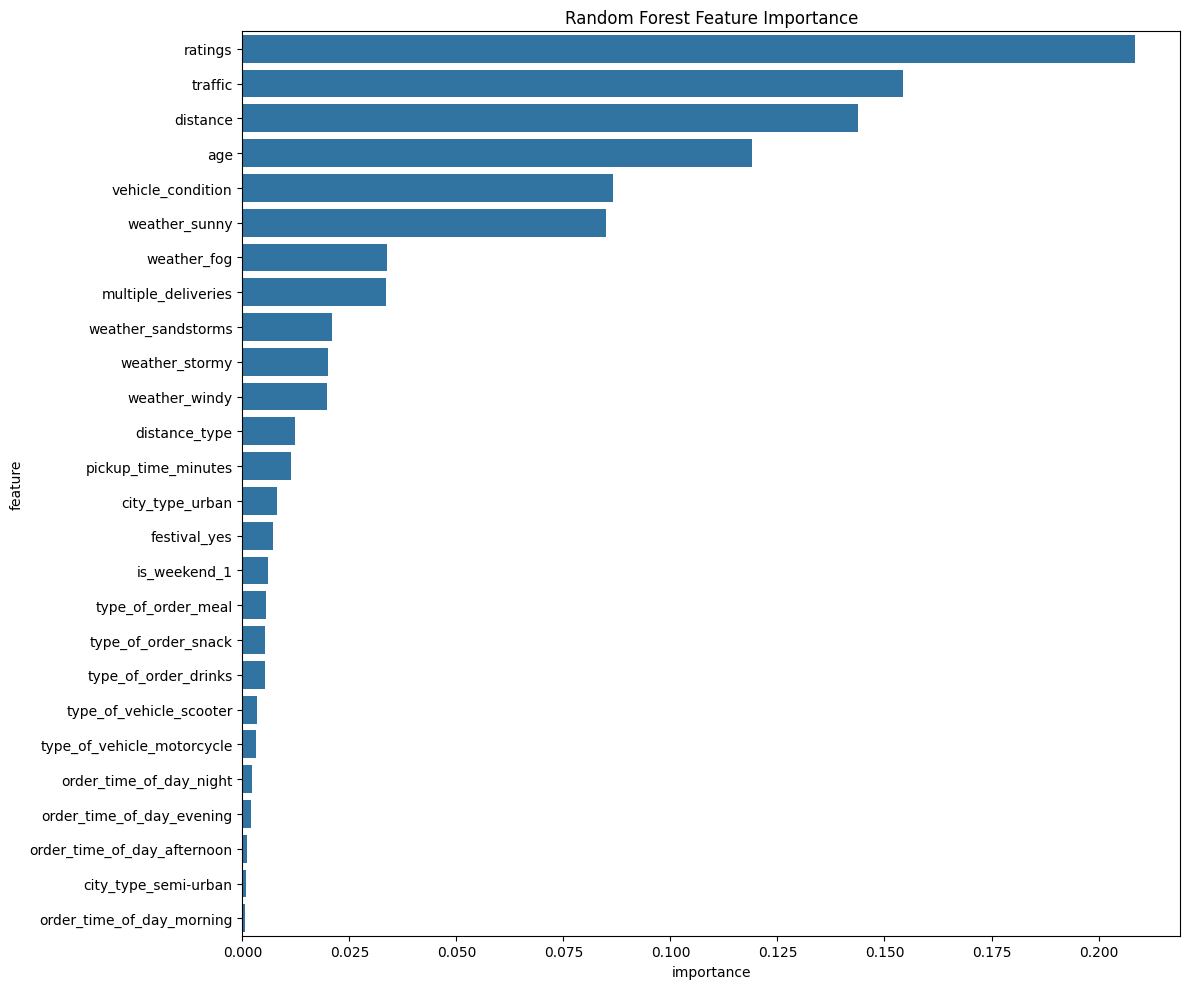

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X_train_trans.columns
importances = rf.feature_importances_
import pandas as pd

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(
    data=fi_df,
    x="importance",
    y="feature",
    orient="h"
)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

In [145]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

rf = RandomForestRegressor(random_state=42)

selector = RFECV(
    estimator=rf,
    step=1,
    cv=KFold(5),
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

selector.fit(X_train_trans, y_train_pt.values.ravel())

print("Optimal number of features:", selector.n_features_)
print("Selected features:")
print(X_train_trans.columns[selector.support_])

Optimal number of features: 25
Selected features:
Index(['age', 'ratings', 'pickup_time_minutes', 'distance', 'weather_fog',
       'weather_sandstorms', 'weather_stormy', 'weather_sunny',
       'weather_windy', 'type_of_order_drinks', 'type_of_order_meal',
       'type_of_order_snack', 'type_of_vehicle_motorcycle',
       'type_of_vehicle_scooter', 'festival_yes', 'city_type_semi-urban',
       'city_type_urban', 'is_weekend_1', 'order_time_of_day_afternoon',
       'order_time_of_day_evening', 'order_time_of_day_night', 'traffic',
       'distance_type', 'vehicle_condition', 'multiple_deliveries'],
      dtype='object')


In [149]:
# selected features from RFECV
selected_cols = X_train_trans.columns[selector.support_]

print("Selected columns:", len(selected_cols))

Selected columns: 25


In [150]:
# subset only RFECV-selected columns
X_train_sel = X_train_trans[selected_cols]
X_test_sel = X_test_trans[selected_cols]

In [151]:

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# train
xgb.fit(X_train_sel, y_train_pt.values.ravel())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [152]:
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print("XGBRegressor with RFECV-selected features:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

XGBRegressor with RFECV-selected features:
MAE: 3.128748302620432
RMSE: 3.90956331656896
R2 Score: 0.8252295777562546


## XGB

In [263]:
from xgboost import XGBRegressor

In [264]:
# 1. Build the model
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [265]:
# 2. Train on transformed features and transformed target
xgb.fit(X_train_trans, y_train_pt.values.ravel())


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [266]:
# 3. Predict on transformed test features
y_pred_pt = xgb.predict(X_test_trans).reshape(-1, 1)

In [267]:
# 4. Inverse transform predictions to original scale
y_pred = pt.inverse_transform(y_pred_pt)
y_test_original = y_test.values.reshape(-1, 1)

# 5. Evaluation
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print("XGBRegressor Performance")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

XGBRegressor Performance
MAE: 3.108487129211426
RMSE: 3.858110599117077
R2 Score: 0.8297995328903198


In [270]:
import mlflow
import mlflow.sklearn
import json

# ✅ Set Experiment
mlflow.set_experiment("Exp 1 - Keeping Vs Dropping Missing Values")

with mlflow.start_run(run_name="XGBRegressor - Dropped Missing Values"):

    # ----- Parameters -----
    mlflow.log_param("model_name", "XGBRegressor")
    mlflow.log_param("missing_strategy", "Dropped Missing Values")
    mlflow.log_param("target_transformation", "PowerTransformer")
    mlflow.log_param("feature_transformations", "ColumnTransformer Pipeline")

    # Log XGB hyperparameters (same format as RF)
    for param_name, param_value in xgb.get_params().items():
        mlflow.log_param(param_name, param_value)

    # ----- Metrics -----
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)

    # ----- Log Feature Names -----
    feature_list = list(X_train_trans.columns)
    mlflow.log_text(json.dumps(feature_list, indent=4), "features.json")

    # ----- Log Model -----
    mlflow.sklearn.log_model(
        sk_model=xgb,
        artifact_path="xgb_model"
    )

    # ----- Log Preprocessor -----
    mlflow.sklearn.log_model(
        sk_model=preprocessor,
        artifact_path="preprocessor"
    )

print("✅ XGBRegressor model logged under: Exp 1 - Keeping Vs Dropping Missing Values")


2025/11/10 14:55:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 14:55:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/10 14:55:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 14:55:48 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/11/10 14:55:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBRegressor - Dropped Missing Values at: http://ec2-13-51-205-67.eu-north-1.compute.amazonaws.com:5000/#/experiments/640006038145149925/runs/b65375823cf54fe48999b5e84883af8c
🧪 View experiment at: http://ec2-13-51-205-67.eu-north-1.compute.amazonaws.com:5000/#/experiments/640006038145149925
✅ XGBRegressor model logged under: Exp 1 - Keeping Vs Dropping Missing Values


## AFTER IMPUTAION



# XGB


In [271]:
imp_df=pd.read_csv('cleaned_data.csv')

In [272]:
imp_df=imp_df.drop(columns=columns_to_drop)

In [273]:

# split into X and y

X = imp_df.drop(columns='time_taken')
y = imp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,0,10.0,morning,1.489846,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,0,5.0,afternoon,6.232393,medium


In [274]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [275]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (36401, 15)
The shape of test data is (9101, 15)


In [276]:
X_train.isna().sum()

age                    1470
ratings                1510
weather                 421
traffic                 407
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     795
festival                188
city_type               968
is_weekend                0
pickup_time_minutes    1298
order_time_of_day         0
distance               2931
distance_type          2931
dtype: int64

In [277]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [278]:
(
    X_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2) * 100
)


16.0

In [279]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'distance',
       'distance_type'],
      dtype='object')

## Imputation Pipeline

In [280]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'is_weekend',
 'order_time_of_day']

In [281]:
X_train.isna().sum()

age                    1470
ratings                1510
weather                 421
traffic                 407
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     795
festival                188
city_type               968
is_weekend                0
pickup_time_minutes    1298
order_time_of_day         0
distance               2931
distance_type          2931
dtype: int64

In [286]:
# features to fill values with mode

features_to_fill_mode = ['multiple_deliveries','festival','city_type']
features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]

features_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'is_weekend',
 'order_time_of_day']

In [287]:
# simple imputer to fill categorical vars with mode

simple_imputer = ColumnTransformer(transformers=[
    ("mode_imputer",SimpleImputer(strategy="most_frequent"),features_to_fill_mode),
    ("missing_imputer",SimpleImputer(strategy="constant",fill_value="missing"),features_to_fill_missing)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

simple_imputer

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'is_weekend', 'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [288]:
simple_imputer.fit_transform(X_train)

,multiple_deliveries,festival,city_type,weather,type_of_order,type_of_vehicle,is_weekend,order_time_of_day,age,ratings,traffic,vehicle_condition,pickup_time_minutes,distance,distance_type
11029,1.0,no,metropolitian,windy,snack,electric_scooter,0,night,26.0,4.7,jam,2,10.0,9.177684,medium
15665,1.0,no,metropolitian,windy,drinks,motorcycle,0,afternoon,21.0,4.9,medium,2,5.0,6.081536,medium
14475,1.0,no,metropolitian,stormy,meal,scooter,1,after_midnight,NaN,NaN,low,2,NaN,1.554563,short
29199,1.0,no,metropolitian,windy,buffet,motorcycle,0,evening,32.0,4.7,medium,0,15.0,20.852271,very_long
22514,0.0,no,urban,sandstorms,meal,scooter,0,night,34.0,4.9,jam,1,5.0,9.056096,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,no,metropolitian,sandstorms,meal,scooter,0,evening,29.0,4.7,jam,2,5.0,12.464367,long
44732,0.0,no,urban,cloudy,buffet,motorcycle,0,morning,36.0,4.8,low,0,10.0,1.520432,short
38158,0.0,no,metropolitian,fog,buffet,scooter,0,evening,36.0,4.4,jam,1,10.0,NaN,NaN
860,1.0,no,metropolitian,windy,meal,scooter,1,evening,25.0,4.9,medium,2,5.0,7.760938,medium


In [289]:
simple_imputer.fit_transform(X_train).isna().sum()

multiple_deliveries       0
festival                  0
city_type                 0
weather                   0
type_of_order             0
type_of_vehicle           0
is_weekend                0
order_time_of_day         0
age                    1470
ratings                1510
traffic                 407
vehicle_condition         0
pickup_time_minutes    1298
distance               2931
distance_type          2931
dtype: int64

In [290]:
# knn imputer

knn_imputer = KNNImputer(n_neighbors=5)

In [291]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [292]:

# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [293]:
for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['jam' 'medium' 'low' 'high' nan]
distance_type ['medium' 'short' 'very_long' 'long' nan]


In [294]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [295]:
preprocessor.fit_transform(X_train)

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,weather_nan,...,city_type_nan,is_weekend_1,order_time_of_day_afternoon,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
11029,0.315789,0.88,0.5,0.395429,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2,1.0
15665,0.052632,0.96,0.0,0.236688,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2,1.0
14475,NaN,NaN,NaN,0.004588,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0
29199,0.631579,0.88,1.0,0.993990,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0,1.0
22514,0.736842,0.96,0.0,0.389195,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.473684,0.88,0.0,0.563939,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2,0.0
44732,0.842105,0.92,0.5,0.002839,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0
38158,0.842105,0.76,0.5,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,-1.0,1,0.0
860,0.263158,0.96,0.0,0.322792,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2,1.0


In [296]:
preprocessor.fit_transform(X_train).isna().sum().loc[lambda ser : ser.ge(1)]

age                    1470
ratings                1510
pickup_time_minutes    1298
distance               2931
multiple_deliveries     795
dtype: int64

In [297]:
processing_pipeline = Pipeline(steps=[
                                ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor),
                                ("knn_imputer",knn_imputer)
                            ])

processing_pipeline

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehi...
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [298]:
model_pipe = Pipeline(steps=[
                                ("preprocessing",processing_pipeline),
                                ("model",rf)
                            ])

model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=42))])

In [299]:
# fit the pipeline on data

model_pipe.fit(X_train,y_train_pt.values.ravel())

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=42))])

In [300]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [188]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [189]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.22 minutes
The test error is 3.28 minutes


In [190]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.97
The test r2 score is 0.80


In [303]:
# ✅ Store only test metrics
test_mae = mean_absolute_error(y_test, y_pred_test_org)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_org))
test_r2 = r2_score(y_test, y_pred_test_org)

# ✅ Print
print(f"The test error is {test_mae:.2f} minutes")
print(f"The test RMSE is {test_rmse:.2f}")
print(f"The test R2 score is {test_r2:.4f}")

The test error is 3.28 minutes
The test RMSE is 4.17
The test R2 score is 0.8024


In [304]:
import mlflow
import mlflow.sklearn
import json

# ✅ Set Experiment
mlflow.set_experiment("Exp 1 - Keeping Vs Dropping Missing Values")

with mlflow.start_run(run_name="Random Forest - Imputed Missing Values"):

    # ----- Parameters -----
    mlflow.log_param("model_name", "RandomForestRegressor")
    mlflow.log_param("missing_strategy", "Imputed Missing Values")
    mlflow.log_param("target_transformation", "PowerTransformer")
    mlflow.log_param("feature_transformations", "ColumnTransformer Pipeline")

    # Log RF hyperparameters
    mlflow.log_param("n_estimators", rf.n_estimators)
    mlflow.log_param("max_depth", rf.max_depth)
    mlflow.log_param("min_samples_split", rf.min_samples_split)
    mlflow.log_param("min_samples_leaf", rf.min_samples_leaf)

    # ----- Metrics -----
    mlflow.log_metric("MAE", test_mae)
    mlflow.log_metric("RMSE", test_rmse)
    mlflow.log_metric("R2", test_r2)

    # ----- Log Feature Names -----
    feature_list = list(X_train_trans.columns)
    mlflow.log_text(json.dumps(feature_list, indent=4), "features.json")

    # ----- Log Model -----
    mlflow.sklearn.log_model(
        sk_model=rf,
        artifact_path="rf_model"
    )

    # ----- Log Preprocessor -----
    mlflow.sklearn.log_model(
        sk_model=preprocessor,
        artifact_path="preprocessor"
    )

print("✅ RF model logged: Imputed Missing Values")


2025/11/10 15:06:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 15:06:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/10 15:12:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 15:12:05 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/11/10 15:12:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest - Imputed Missing Values at: http://ec2-13-51-205-67.eu-north-1.compute.amazonaws.com:5000/#/experiments/640006038145149925/runs/706ba0feb4d640b9b3d1961def94ba19
🧪 View experiment at: http://ec2-13-51-205-67.eu-north-1.compute.amazonaws.com:5000/#/experiments/640006038145149925
✅ RF model logged: Imputed Missing Values


## XGB 




In [305]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [306]:

model_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb)
])

In [307]:
model_pipe.fit(X_train, y_train_pt.values.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  ['age', 'ratings',
                                                   'pickup_time_minutes',
                                                   'distance']),
                                                 ('nominal_encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival'...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [308]:
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [309]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1, 1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1, 1))

In [311]:
test_mae = mean_absolute_error(y_test, y_pred_test_org)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_org))
test_r2 = r2_score(y_test, y_pred_test_org)

print(f"The test error is {test_mae:.2f} minutes")
print(f"The test RMSE is {test_rmse:.2f}")
print(f"The test R2 score is {test_r2:.4f}")

The test error is 3.27 minutes
The test RMSE is 4.11
The test R2 score is 0.8077


In [312]:
import mlflow
import mlflow.sklearn
import json

# ✅ Set Experiment
mlflow.set_experiment("Exp 1 - Keeping Vs Dropping Missing Values")

with mlflow.start_run(run_name="XGBRegressor - Imputed Missing Values"):

    # ----- Parameters -----
    mlflow.log_param("model_name", "XGBRegressor")
    mlflow.log_param("missing_strategy", "Imputed Missing Values")
    mlflow.log_param("target_transformation", "PowerTransformer")
    mlflow.log_param("feature_transformations", "ColumnTransformer Pipeline")

    # ----- Log XGB parameters from model_pipe -----
    xgb_params = model_pipe.named_steps["model"].get_params()
    for p_name, p_value in xgb_params.items():
        mlflow.log_param(p_name, p_value)

    # ----- Metrics -----
    mlflow.log_metric("MAE", test_mae)
    mlflow.log_metric("RMSE", test_rmse)
    mlflow.log_metric("R2", test_r2)

    # ----- Log feature names -----
    feature_list = list(X_train_trans.columns)
    mlflow.log_text(json.dumps(feature_list, indent=4), "features.json")

    # ----- Log model_pipe -----
    mlflow.sklearn.log_model(
        sk_model=model_pipe,
        artifact_path="xgb_model_pipe"
    )

    # ----- Log preprocessor separately -----
    mlflow.sklearn.log_model(
        sk_model=preprocessor,
        artifact_path="preprocessor"
    )

print("✅ XGBRegressor model (model_pipe) logged: Imputed Missing Values")


2025/11/10 15:13:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 15:14:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/10 15:14:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 15:14:16 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/11/10 15:14:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBRegressor - Imputed Missing Values at: http://ec2-13-51-205-67.eu-north-1.compute.amazonaws.com:5000/#/experiments/640006038145149925/runs/48bb3662b0d0419fa7834861654a4c07
🧪 View experiment at: http://ec2-13-51-205-67.eu-north-1.compute.amazonaws.com:5000/#/experiments/640006038145149925
✅ XGBRegressor model (model_pipe) logged: Imputed Missing Values
